Import Packages

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

Load Data

In [6]:
Income21 = pd.read_csv("../../Data/hhpub21.csv")
Income20 = pd.read_csv("../../Data/hhpub20.csv")
Income19 = pd.read_csv("../../Final/Data/hhpub19.csv")

StateHomelessPop = pd.read_excel("../../Data/HomelessTotals.xlsx")

In [7]:
StateHomelessPop.head()

,Unnamed: 0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,HomelessPopulation,State,Year
0,Alabama,5452.0,5387.0,6080.0,6046.0,5558.0,5209.0,4689.0,4561.0,3970.0,4111.0,3793.0,3434.0,3261.0,3351.0,5452,Alabama,2007
1,Alaska,1642.0,1646.0,1992.0,1863.0,2128.0,1913.0,1946.0,1784.0,1956.0,1940.0,1845.0,2016.0,1907.0,1949.0,5387,Alabama,2008
2,Arizona (1),14646.0,12488.0,14721.0,13711.0,10504.0,11302.0,10562.0,10495.0,9896.0,9707.0,8947.0,9865.0,10007.0,10979.0,6080,Alabama,2009
3,Arkansas (1),3836.0,3255.0,2852.0,2762.0,3424.0,4214.0,3812.0,2936.0,2560.0,2463.0,2467.0,2712.0,2717.0,2366.0,6046,Alabama,2010
4,California (1),138986.0,136531.0,123678.0,123480.0,125128.0,120098.0,118552.0,113952.0,115738.0,118142.0,131532.0,129972.0,151278.0,161548.0,5558,Alabama,2011


Data Wrangling

In [14]:
Income21Keeps = Income21[['H_YEAR', 'H_LIVQRT', 'H_TENURE', 'H_NUMPER', 'HHINC', 'HDIS_YN', 'HINC_UC', 'HPAW_YN']]

In [18]:
pd.options.mode.chained_assignment = None

In [19]:
Income21Keeps.rename(columns={'H_LIVQRT' : 'TypeOfHousing21'}, inplace=True)
Income21Keeps.rename(columns={'H_TENURE' : 'RentOrOwn21'}, inplace=True)
Income21Keeps.rename(columns={'H_NUMPER' : 'PersonsInHousehold21'}, inplace=True)
Income21Keeps.rename(columns={'HHINC' : 'HouseholdIncomeAmt21'}, inplace=True)
Income21Keeps.rename(columns={'HDIS_YN' : 'Disability21'}, inplace=True)
Income21Keeps.rename(columns={'HINC_UC' : 'Unemployment21'}, inplace=True)
Income21Keeps.rename(columns={'HPAW_YN' : 'Welfare21'}, inplace=True)

In [23]:
IncomeY = Income21Keeps[['HouseholdIncomeAmt21']]
IncomeX = Income21Keeps[['TypeOfHousing21', 'RentOrOwn21', 'PersonsInHousehold21', 'Disability21', 'Unemployment21', 'Welfare21']]

Train Test Split

In [34]:
x_train, x_test, y_train, y_test = train_test_split(IncomeX, IncomeY, test_size = .2, random_state=101)

Create Random Forest Model

In [38]:
forest = RandomForestClassifier(n_estimators=100, random_state=76)
forest.fit(x_train, y_train)

/var/folders/bh/tk1s08xn44l3bl8vxph612m40000gn/T/ipykernel_9211/292930261.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train, y_train)


RandomForestClassifier(random_state=76)

In [39]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[5584    0    0 ...    0    0    0]
 [   0    8    0 ...    0    0  295]
 [   0    1    0 ...    0    0   74]
 ...
 [   0    0    0 ...    0    0  140]
 [   0    0    0 ...    0    0  116]
 [   0    3    0 ...    0    1 4248]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5584
           1       0.19      0.03      0.04       315
           2       0.00      0.00      0.00        83
           3       0.00      0.00      0.00       106
           4       0.00      0.00      0.00       164
           5       0.07      0.02      0.03       249
           6       0.14      0.02      0.03       292
           7       0.12      0.04      0.06       273
           8       0.04      0.00      0.01       271
           9       0.00      0.00      0.00       293
          10       0.00      0.00      0.00       253
          11       0.09      0.00      0.01       278
          12       0.00      0.00      0.00       241
          13   

/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


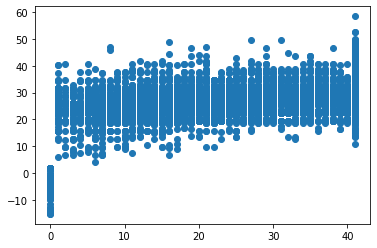

In [28]:
plt.scatter(y_test, HouseholdIncomePredictions)


In [29]:
print("Score:", lm.score(x_test, y_test))


Score: 0.6108437185196196


In [33]:
metrics.mean_absolute_error(y_test, HouseholdIncomePredictions)


8.234765862643572